<a href="https://colab.research.google.com/github/daffu081/Statistics/blob/main/Sabbir_2410_stat_ass4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving insurance.csv to insurance.csv
First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summar

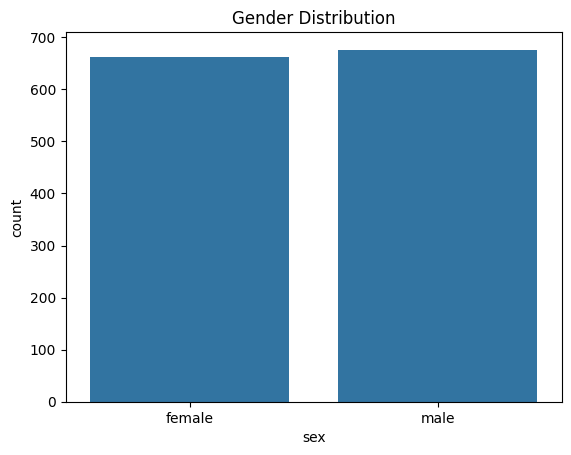


Smoker Distribution:
smoker
no     1064
yes     274
Name: count, dtype: int64


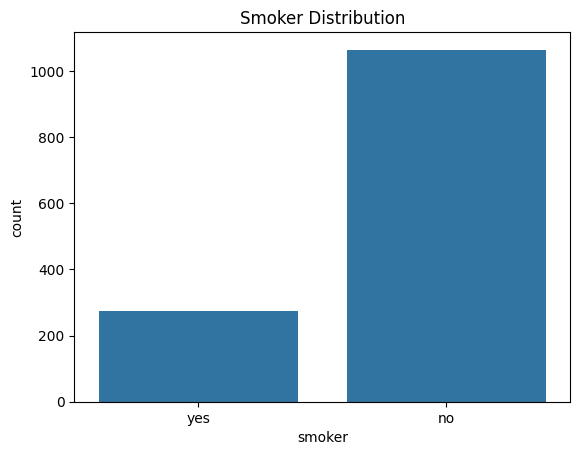


Average Medical Cost by Region:
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


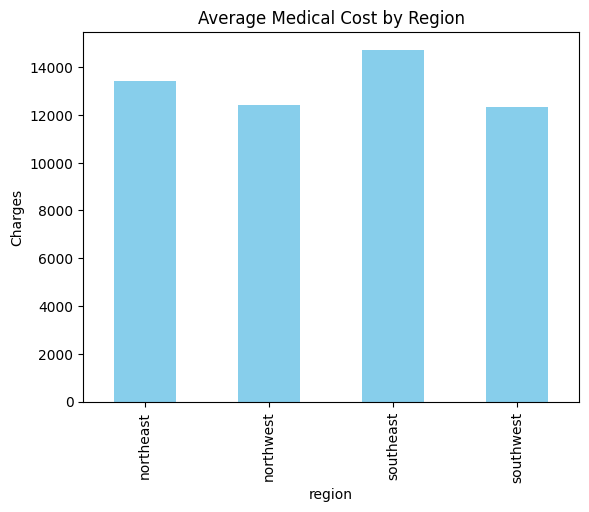

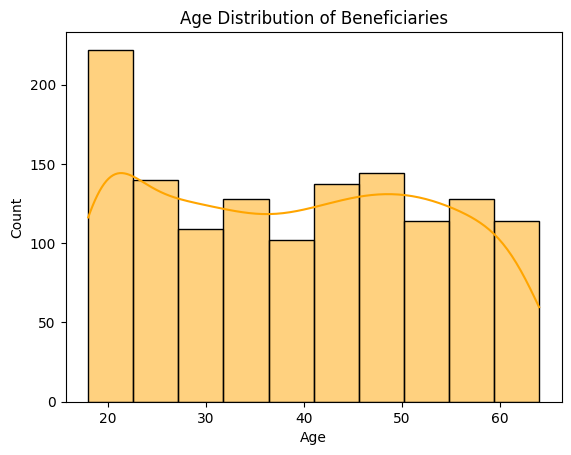

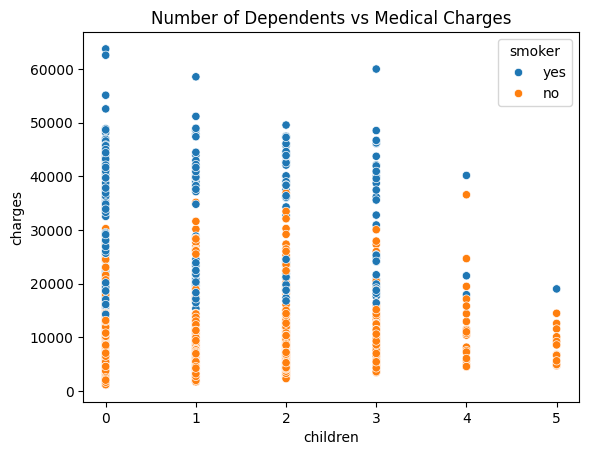


T-test for Smokers vs Non-Smokers Medical Charges:
T-statistic: 46.66492117272371, P-value: 8.271435842179102e-283
Smokers have significantly higher medical costs.

T-test for BMI of Males vs Females:
T-statistic: 1.696752635752224, P-value: 0.08997637178984932
No significant difference in BMI between males and females.

Chi-square Test for Smokers Across Regions:
Chi-square Statistic: 7.343477761407071, P-value: 0.06171954839170541
No significant difference in the proportion of smokers across regions.

ANOVA Test for BMI of Women with Different Numbers of Children:
F-statistic: 0.3344720147757968, P-value: 0.7158579926754841
No significant difference in mean BMI across groups.

Analysis Complete!


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

# Load the dataset
from google.colab import files
uploaded = files.upload()  # Upload the 'insurance.csv' file

# Read the dataset
insurance_data = pd.read_csv('insurance.csv')

# Overview of the dataset
print("First few rows of the dataset:")
print(insurance_data.head())
print("\nDataset Info:")
print(insurance_data.info())
print("\nSummary Statistics:")
print(insurance_data.describe())

# 1. Are there more Male beneficiaries?
gender_counts = insurance_data['sex'].value_counts()
print("\nGender Distribution:")
print(gender_counts)
sns.countplot(x='sex', data=insurance_data)
plt.title('Gender Distribution')
plt.show()

# 2. Are there more smokers?
smoker_counts = insurance_data['smoker'].value_counts()
print("\nSmoker Distribution:")
print(smoker_counts)
sns.countplot(x='smoker', data=insurance_data)
plt.title('Smoker Distribution')
plt.show()

# 3. Which region has the maximum medical cost billed to health insurance?
region_avg_charges = insurance_data.groupby('region')['charges'].mean()
print("\nAverage Medical Cost by Region:")
print(region_avg_charges)
region_avg_charges.plot(kind='bar', color='skyblue')
plt.title('Average Medical Cost by Region')
plt.ylabel('Charges')
plt.show()

# 4. What is the age of the beneficiaries?
sns.histplot(insurance_data['age'], kde=True, bins=10, color='orange')
plt.title('Age Distribution of Beneficiaries')
plt.xlabel('Age')
plt.show()

# 5. Do beneficiaries with more dependents have higher medical costs?
sns.scatterplot(x='children', y='charges', data=insurance_data, hue='smoker')
plt.title('Number of Dependents vs Medical Charges')
plt.show()

# 6. Prove (or disprove) that smokers incur higher medical costs.
smokers = insurance_data[insurance_data['smoker'] == 'yes']['charges']
non_smokers = insurance_data[insurance_data['smoker'] == 'no']['charges']
t_stat, p_value = ttest_ind(smokers, non_smokers)
print(f"\nT-test for Smokers vs Non-Smokers Medical Charges:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Smokers have significantly higher medical costs.")
else:
    print("No significant difference in medical costs between smokers and non-smokers.")

# 7. Is BMI significantly different between males and females?
males = insurance_data[insurance_data['sex'] == 'male']['bmi']
females = insurance_data[insurance_data['sex'] == 'female']['bmi']
t_stat, p_value = ttest_ind(males, females)
print(f"\nT-test for BMI of Males vs Females:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("BMI is significantly different between males and females.")
else:
    print("No significant difference in BMI between males and females.")

# 8. Is the proportion of smokers significantly different across regions?
contingency_table = pd.crosstab(insurance_data['region'], insurance_data['smoker'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square Test for Smokers Across Regions:")
print(f"Chi-square Statistic: {chi2}, P-value: {p}")
if p < 0.05:
    print("Proportion of smokers differs significantly across regions.")
else:
    print("No significant difference in the proportion of smokers across regions.")

# 9. Is the mean BMI of women with no children, one child, and two children the same?
women = insurance_data[insurance_data['sex'] == 'female']
groups = [women[women['children'] == i]['bmi'] for i in range(3)]
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(*groups)
print(f"\nANOVA Test for BMI of Women with Different Numbers of Children:")
print(f"F-statistic: {f_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Mean BMI differs significantly between groups.")
else:
    print("No significant difference in mean BMI across groups.")

print("\nAnalysis Complete!")
